## Final Project Submission

Please fill out:
* Student name: Timothy Lim
* Student pace: self paced
* Scheduled project review date/time: Friday, Jan 15th 2020
* Instructor name: Jeff Herman
* Blog post URL:
https://timothywlim.medium.com/baby-steps-in-exploratory-data-analysis-eda-with-python-ac6843b30f76


## Business Understanding
This project role played Microsoft as a company looking into joining the movie industry. Based on the data provided, analysis is done and a presentation is created to explores what type of films are currently doing the best at the box office. Findings are translated to actionable insights that CEO can use when deciding what type of films they should be creating.

## Data Mining
A collections of datas imported from imdb, rotten tomatoes, and tmdb. Datas are previewed prior cleaning. Additional datas could be scraped from websites if needed. The csv files were all read and import as dataframes. After previewing through all of them, we picked a few to analyze more in depth.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
ls

CONTRIBUTING.md             imdb.title.ratings.csv
LICENSE.md                  module1_project_rubric.pdf
README.md                   rt.movie_info.tsv
awesome.gif                 rt.reviews.tsv
bom.movie_gross.csv         student.ipynb
imdb.name.basics.csv        tmdb.movies.csv
imdb.title.akas.csv         tn.movie_budgets.csv
imdb.title.basics.csv       workbook_raw.ipynb
imdb.title.principals.csv


In [3]:
# reading all csv files into dataframe
imdb_name = pd.read_csv('imdb.name.basics.csv')
imdb_akas = pd.read_csv('imdb.title.akas.csv')
imdb_basics = pd.read_csv('imdb.title.basics.csv')
imdb_principals = pd.read_csv('imdb.title.principals.csv')
imdb_ratings = pd.read_csv('imdb.title.ratings.csv')

#tsv is tab seperated values as oppose to comma seperated values,
# we could read tsv using csv by calling out tab as the seperator
rt_movie = pd.read_csv('rt.movie_info.tsv', sep='\t')

# reading tsv using csv as above. Also, setting encoding to latin1
# because some characters are not written in 'utf-8' codec 
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='latin1')
tmdb_ratings = pd.read_csv('tmdb.movies.csv')
tn_budgets = pd.read_csv('tn.movie_budgets.csv')

In [4]:
#screen through dataframe summary, index and columns types and preview top 5 lines
imdb_name.info()
imdb_name.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
imdb_akas.info()
imdb_akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
imdb_basics.info()
imdb_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
imdb_principals.info()
imdb_principals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [8]:
imdb_ratings.info()
imdb_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
rt_movie.info()
rt_movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
rt_reviews.info()
rt_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
tmdb_ratings.info()
tmdb_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
tn_budgets.info()
tn_budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Cleaning

The first step into analyzing data is data cleaning. Often data might be incomplete, duplicated, mixed formated (str & integer) or wrongly formated. This section will shows some of the tecniques cleaning up the dataframe prior to analyzing.

The following sections are divided to 3 subsections. The main sections shows the progress in anayzing the datas while the 3 subsections address 3 unique questions that would help Microsoft to decide how to explore into the movie industry.

### Cleaning of imdb_basics dataframe (Q1: Movie Genres)

QUESTION #1
What are the genre of the movies that was released in the last X years?
The idea for this question was to explore the movie industry genre trends and potentially gauging movies' popularity and profitability baased on genre. Knowing that movies are often consiting more than one genre; it is still useful as a guide for a company new to the industry to understands what attracts and what does not.

In imdb_basics csv files we try to clean some duplicates. A quick search shows 10073 duplicates for primary_title and 8370 duplicates for original_title. As we investigate more, some of the primary_title share the same names but are movies created in different year. Whereas, the most of the duplicated original_title are same movie bue in different language. Here we assume movie watchers would pick to watch a movie in their most comfortable language and thus cutting down the overlap of entry when calculating total genre of movie each year.

In [13]:
# droping duplicates in original title
imdb_basics_drpduplicate = imdb_basics.drop_duplicates(subset = 'original_title')

In [14]:
# preview 'genres' of imdb_basics_drpduplicate
imdb_basics_drpduplicate['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 137774, dtype: object

As seen above, line 137774 contains NaN (not a number/ do not have value). We will input 'missing' as a genre of itself so that python does not throw a error when counting NaN.

In [15]:
# substituting NaN in 'genre' as 'missing', inplace true to keep the same dataframe
imdb_basics_drpduplicate['genres'].fillna('missing', inplace = True)

/Users/timothylim/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
# dropping non-needed information
dfbasic = imdb_basics_drpduplicate.drop(['primary_title','runtime_minutes'],axis=1)

### Cleaning of tn_budgets dataframe (Q2: Movie Release Date)

QUESTION #2
Does release date affects movie gross? Is there a preffered months for movie release?
We are trying to gage if production budget, domestic and worldwide gross are affected by movie release date.

In [17]:
# taking a slice of the production data to observe the written format
tn_budgets['production_budget'][1]

'$410,600,000'

In [18]:
# checking data type of index
type(tn_budgets['production_budget'][1])

str

In [19]:
# striping the "$" and "," and changing string to integer
tn_budgets['production_budget'] = tn_budgets['production_budget'].map(lambda x: int(x.strip('$').replace(',','')))
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].map(lambda x: int(x.strip('$').replace(',','')))
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].map(lambda x: int(x.strip('$').replace(',','')))

In [20]:
# create new column for movie release month, parsing string format to datetime format
tn_budgets['release_month'] = tn_budgets['release_date'].map(lambda x: datetime.strptime(x,'%b %d, %Y').month)

In [21]:
# create new column for movie release year, parsing string format to datetime format
tn_budgets['release_year'] = tn_budgets['release_date'].map(lambda x: datetime.strptime(x,'%b %d, %Y').year)

In [22]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017


In [23]:
#checking the latest recorded year in dataframe
tn_budgets['release_year'].max()

2020

In [24]:
#checking the oldest recorded year in dataframe
tn_budgets['release_year'].min()

1915

In [25]:
#doing a quick count of movies released each year
tn_budgets['release_year'].value_counts(sort=True, ascending=True)

1915      1
1937      1
1941      1
1927      1
1947      1
       ... 
2014    255
2006    260
2008    264
2010    274
2015    338
Name: release_year, Length: 96, dtype: int64

Data for movies released in earlier years are less frequent and will just be included at this point for mean calculation. We are assuming that the combination of movies across the years is a fair way to gage the earning across the years, assuming that the quality demand of movie does change over the years and so are the budget demand. On the flip side, we are also considering multiple recent movies that broke the record office are the other extreme that will throw off our data.  At this point, we will rely on boxplot later in visualization part to reduce the outliers and ploting the interquantile range.

In [53]:
# Dropping unneeded columns, creating a new dataframe as we modify dataframe data
tn_budgets_clean = tn_budgets.drop(['id','release_date','release_year'], axis=1)

### Cleaning of tn_budgets_earnings dataframe (Q3: Movie Budget vs Earnings)

QUESTION #3
How much does movie production cost? What's the expected range of a profitable movie and what is the expected earnings? 

We know some movies explode the box office but some do not fair well. There are many things that influnce that. Knowing how much budget range for most profitable movies will gives Microsoft a benchmark on what is the appropriate capital to spend for each movie, and what is the expected profit margin. These helps to set realistic goals, and are decision factors for companies to gage if there is a business case for venturing into a new field.

In [27]:
# using previous tn-budgets dataframe we drop non-needed columns
tn_budgets_earnings = tn_budgets.drop(['id','release_date', 'release_month', 'release_year'], axis=1)

## Data Exploration

The Data Exploration section we will reorganize or search deeper to 'make sense' of the data, making hypothesis, searching for trends and focus in on useful data. These information will help us in our planning, to make better decisions and predictions.

### Exploring imdb_basics_clean dataframe (Q1: Movie Genres)

Many of the movies consist more than one genre, we ended up with (i.e. "Action, Crime, Drama" as one genre). This makes counting the genres very inefficient because unless two movies shares the exact same genre list, it will each otherwise be considered a movie of its' own genre. With that, we have to divide up the movie genres and find out a total of unique genres.

Considering the work, this is a bit of exploration + cleaning. To get down to the unique genres we end up having to clean the dataframe more and build our own new list and new dataframe.

In [28]:
#listing all genres into one list of lists
list_genres = imdb_basics_drpduplicate.genres.values.tolist()

#creating a single list of all the genres
newlist_genre = list()
#Iterate over list_genres
for item in list_genres:
    #split the element string into a single list by removing ','
    genres = item.split(',')
    #extend/ combine all the genres into newlist_genre
    newlist_genre.extend(genres)

In [29]:
#creating a unique genre list
uniq_genre = list(set(newlist_genre))

In [30]:
#check number of unique genre
print('They are total of {} unique genre.'.format(len(set(newlist_genre))))

They are total of 28 unique genre.


We will build a new dataframe with extra columns where each genre will get its' own column. Each movie is then match with their genre in a 1 for true, 0 for false (no match) fashion.

In [31]:
#creating a new dataframe with each unique genre having a column and counter for match
for genre_1 in uniq_genre:
    dfbasic[genre_1] = dfbasic.apply(lambda x: 1 if genre_1 in x['genres'] else 0, axis=1)

In [32]:
#preview new dataframe
dfbasic.head()

,tconst,original_title,start_year,genres,Fantasy,Documentary,Crime,History,Reality-TV,Western,...,Comedy,War,Talk-Show,Music,Horror,Short,Game-Show,Romance,Action,News
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


From the previous exploration we noticed that the data after year 2018 shows unusual low count, it is most likely not complete since the data was collected a little bit around late 2019 to early 2020. Also, with the Covid going on, the 2020 data is not as reliable because viewers are probably streaming movies as home more than visiting the theater/ cinema.

In [33]:
#dropping data after 2018
dfbasic.drop(dfbasic[dfbasic['start_year'] > 2018].index, inplace = True)

In [34]:
dfbasic.groupby(['start_year']).sum()

,Fantasy,Documentary,Crime,History,Reality-TV,Western,Thriller,Sport,Drama,Biography,...,Comedy,War,Talk-Show,Music,Horror,Short,Game-Show,Romance,Action,News
start_year,,,,,,,,,,,,,,,,,,,,,
2010,266,4327,527,597,7,37,805,184,4189,778,...,2142,139,3,517,755,0,0,829,874,175
2011,302,4678,553,635,0,43,856,211,4360,877,...,2271,134,4,604,858,1,0,818,880,197
2012,306,5096,571,748,5,44,947,213,4593,976,...,2420,130,4,635,932,1,0,830,889,239
2013,314,5392,685,871,9,37,1130,265,5061,1209,...,2578,114,4,640,982,0,1,985,959,286
2014,343,5760,703,889,7,59,1203,269,5107,1309,...,2693,166,4,681,1058,0,1,1078,1002,317
2015,364,5757,665,660,19,51,1167,237,5031,899,...,2630,163,11,597,1045,0,0,1018,993,155
2016,418,5743,767,541,18,35,1225,254,5052,770,...,2694,157,8,536,1170,0,0,998,1108,50
2017,361,5793,697,488,15,49,1180,211,5044,705,...,2642,149,2,541,1218,4,1,896,1159,38
2018,398,5000,653,418,10,50,1296,184,5030,551,...,2657,129,7,457,1185,4,0,884,1030,29


In [35]:
#resetting index of dataframe
dfbasic_all = dfbasic.groupby(['start_year']).sum()

In [36]:
dfbasic_all

,Fantasy,Documentary,Crime,History,Reality-TV,Western,Thriller,Sport,Drama,Biography,...,Comedy,War,Talk-Show,Music,Horror,Short,Game-Show,Romance,Action,News
start_year,,,,,,,,,,,,,,,,,,,,,
2010,266,4327,527,597,7,37,805,184,4189,778,...,2142,139,3,517,755,0,0,829,874,175
2011,302,4678,553,635,0,43,856,211,4360,877,...,2271,134,4,604,858,1,0,818,880,197
2012,306,5096,571,748,5,44,947,213,4593,976,...,2420,130,4,635,932,1,0,830,889,239
2013,314,5392,685,871,9,37,1130,265,5061,1209,...,2578,114,4,640,982,0,1,985,959,286
2014,343,5760,703,889,7,59,1203,269,5107,1309,...,2693,166,4,681,1058,0,1,1078,1002,317
2015,364,5757,665,660,19,51,1167,237,5031,899,...,2630,163,11,597,1045,0,0,1018,993,155
2016,418,5743,767,541,18,35,1225,254,5052,770,...,2694,157,8,536,1170,0,0,998,1108,50
2017,361,5793,697,488,15,49,1180,211,5044,705,...,2642,149,2,541,1218,4,1,896,1159,38
2018,398,5000,653,418,10,50,1296,184,5030,551,...,2657,129,7,457,1185,4,0,884,1030,29


In [37]:
#looking into the top cumulative genres over the years
dfbasic_cumul = dfbasic.groupby(['start_year']).sum().sum().sort_values(ascending = False)

In [38]:
dfbasic_cumul

Documentary    47546
Drama          43467
Comedy         22727
Thriller        9809
Horror          9203
Action          8894
Romance         8336
Biography       8074
History         5847
Crime           5821
Adventure       5755
Family          5618
Music           5208
missing         4550
Mystery         4004
Fantasy         3072
Sci-Fi          2868
Animation       2451
Sport           2028
News            1486
Musical         1291
War             1281
Western          405
Reality-TV        90
Talk-Show         47
Adult             24
Short             10
Game-Show          3
dtype: int64

In [39]:
#picking the genres that has more than 8000 cumulative accounts over the 9 years
Genre_pres = list(dfbasic_cumul[dfbasic_cumul > 8000].index)

In [40]:
#creating a final dataframe of top genres (> 8000 accounts) over the 9 years
dfbasic_pres = dfbasic.groupby(['start_year']).sum()[Genre_pres]

### Exploring tn_budgets dataframe (Q2: Movie Release Dates)

Doing a quick count of the movies accross the years, grouping by the month they were produced. Here we are trying to capture the frequency of "peak months" where producers like to release their movies. Also, by doing the mean for prodution budgets and earnings we get to see if there is a "movie season" where movie watchers like to visit the theaters.

In [41]:
# quick count of total movies released each month
tn_budgets_clean.groupby(['release_month']).count()

,movie,production_budget,domestic_gross,worldwide_gross,release_year
release_month,,,,,
1,347,347,347,347,347
2,392,392,392,392,392
3,470,470,470,470,470
4,454,454,454,454,454
5,407,407,407,407,407
6,479,479,479,479,479
7,440,440,440,440,440
8,496,496,496,496,496
9,493,493,493,493,493


In [55]:
# calculating mean of prodution budget, domestic gross and worldwide gross for each months since 2010-2018
tn_budgets_pres2 = tn_budgets_clean.groupby(['release_month']).mean()

In [56]:
# showing mean/average of production_budget vs earnings dataframe for the 12 months since 2010-2018
tn_budgets_pres2

,production_budget,domestic_gross,worldwide_gross
release_month,,,
1,2.084349e+07,2.394962e+07,4.656382e+07
2,2.804642e+07,3.541465e+07,7.154453e+07
3,3.078208e+07,3.857299e+07,8.063337e+07
4,2.380283e+07,2.732840e+07,5.992026e+07
5,4.713520e+07,6.669795e+07,1.622680e+08
6,4.309912e+07,6.582791e+07,1.425230e+08
7,4.254616e+07,6.072804e+07,1.409636e+08
8,2.555609e+07,3.216821e+07,6.097841e+07
9,2.181290e+07,2.314989e+07,4.669369e+07


### Exploring of tn_budgets_earnings dataframe (Q3: Movie Budget vs Earnings)

In question 2 we found out when are peak seasons to release movies and saw the peak seasons for movie revenues.

Question 3 we focus more on the budgets and the return of earnings. Finding the sweetspot for our budget. This will answer how much Microsoft should spend on a single movie or how many movies can we produce with budgets we have. To measure that, we need to calculate net profit and rate of return.

In [44]:
#setting up variables and calculating net profit
gross =  tn_budgets_earnings['worldwide_gross']
budget = tn_budgets_earnings['production_budget']
net_profit = gross - budget

In [45]:
#creating a new columns for rate of return calculation in percentage
tn_budgets_earnings['RoR'] = round((net_profit)/budget * 100 ,2)

In [46]:
#creating a new columns for net profit
tn_budgets_earnings['net_profit'] = net_profit

In [47]:
#preview new calculated columns
tn_budgets_earnings.head()

,movie,production_budget,domestic_gross,worldwide_gross,RoR,net_profit
0,Avatar,425000000,760507625,2776345279,553.26,2351345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.67,635063875
2,Dark Phoenix,350000000,42762350,149762350,-57.21,-200237650
3,Avengers: Age of Ultron,330600000,459005868,1403013963,324.38,1072413963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.37,999721747


## Data Visualization

This section we will present the data into tables, charts, visuals that aids understanding of a certain patterns, trends or predictions we analyzed through previous explorations.

### Visualizing imdb_basics_present dataframe (Q1: Movie Genres)

The line graph below shows the sum of movies occurence falling under a certain genre in a running x-axis over the years. Most movies fall under multiple genres. However by breaking down each unique genre we get to gage what are the more popular genres, and how do they fair ratio wise to the non popular genres.

Text(0.5, 1.0, 'Genre of Movies From 2010 to 2018')

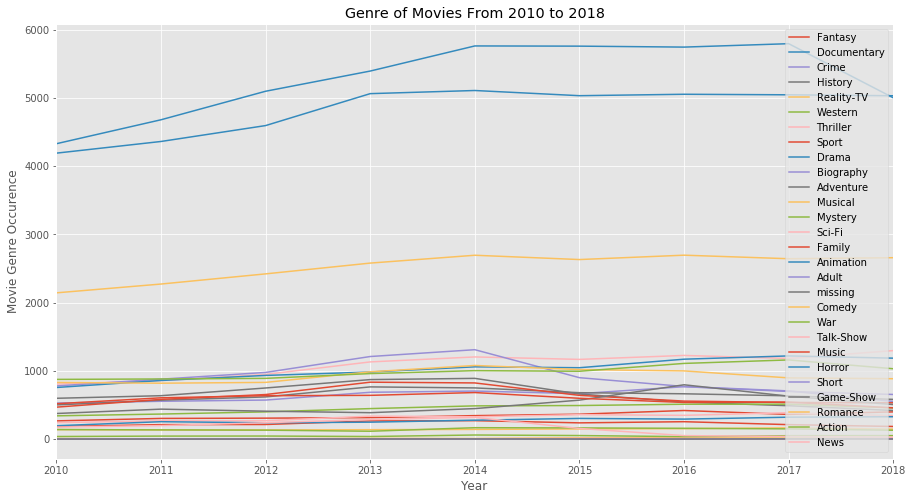

In [48]:
# Ploting sum of movie genre over the years
plt.style.use('ggplot')
dfbasic_all.plot(kind = 'line', figsize = (15,8))
plt.xlabel('Year')
plt.ylabel('Movie Genre Occurence')
plt. title('Genre of Movies From 2010 to 2018')

Analysis: This is definitely a busy graph. It is really hard to exactly tell which genre falls on which line. However, this graphs shows a good comparisons between genres where the top 2 genres are above 4000 count yearly, 1 genre is abve 2000 yearly and most of the rest falls between 0 to approximlatly 1000.

Text(0.5, 1.0, 'Top 8 Genre of Movies From 2010 to 2018')

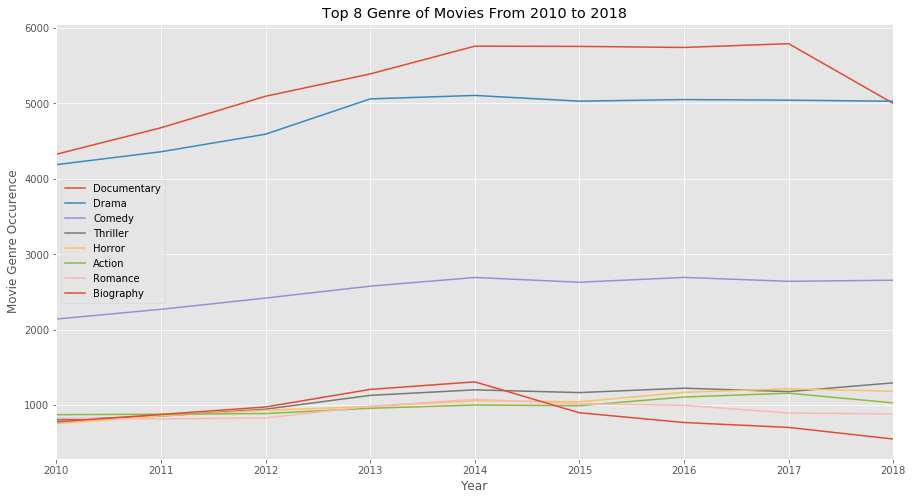

In [49]:
#Slicing data from above line graph to include only the top 8 genres
dfbasic_pres.plot(kind = 'line', figsize = (15,8))
plt.xlabel('Year')
plt.ylabel('Movie Genre Occurence')
plt. title('Top 8 Genre of Movies From 2010 to 2018')

Analysis: The top 8 genre is helpful showing us Documentary and Drama fair the best, Comedy is next follows by Thriller, Horror, Action, Romance and Biography. 

### Visualizing tn_budgets_pres dataframe (Q2: Movie Release Date)

A quick look into the mean of movie production budgets, domestic gross and worldwide gross over the months gives us a good idea when are the peak movie seasons.

Text(0.5, 1.0, 'Mean of Movie Budgets and Earnings vs Release Months (year 1915~2015)')

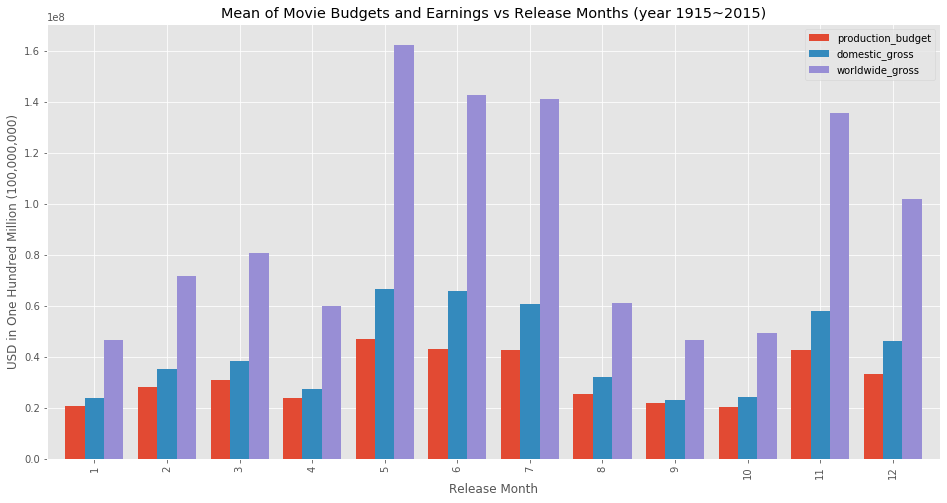

In [69]:
#plotting a bar graph for mean of movie budgets and earnings vs release months
tn_budgets_pres2.plot(kind='bar',figsize=(16,8), width = .8)
plt.xlabel('Release Month')
plt.ylabel('USD in One Hundred Million (100,000,000)')
plt. title('Mean of Movie Budgets and Earnings vs Release Months (year 1915~2015)')

Analysis: It is interesting to point out that the domestic gross seems to often break even the production budget. The peak months for good box office sales are May, June, July, November and December. The summer and winter holidays for the US. 

Since the mean does not take account of outliers, we could try using box plot to fnd out more regarding the Max, Min, Interquantile and Mean excluding the outliers.

Using seaborn library we were able to get a nice boxplot for Production budget vs release date.

Text(0.5, 1.0, 'Production Budget vs Release Date')

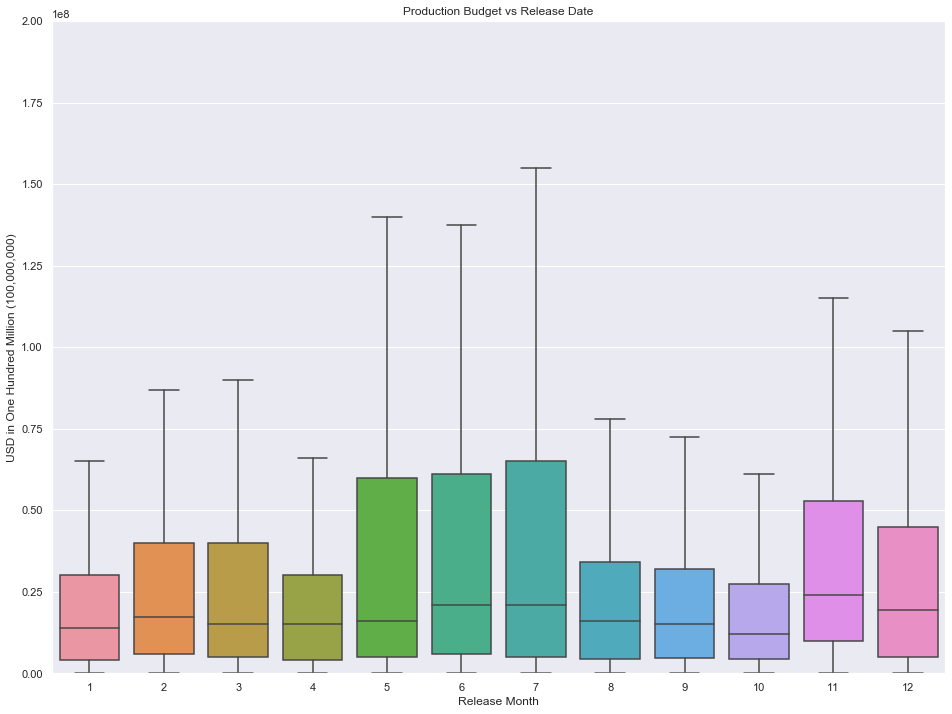

In [297]:
#creating boxplot of production budget vs release date
#there are many outliers, we turn off showing of outliers to get a compact visual
sns.set(rc={'figure.figsize':(16,12)})
plt.ylim([0,200000000])
sns.boxplot(x='release_month', y='production_budget', data= tn_budgets_clean, showfliers = False)
plt.xlabel('Release Month')
plt.ylabel('USD in One Hundred Million (100,000,000)')
plt. title('Production Budget vs Release Date')

We tried the same thing for worldwide gross vs release month.

Text(0.5, 1.0, 'Worldwide Gross vs Release Month')

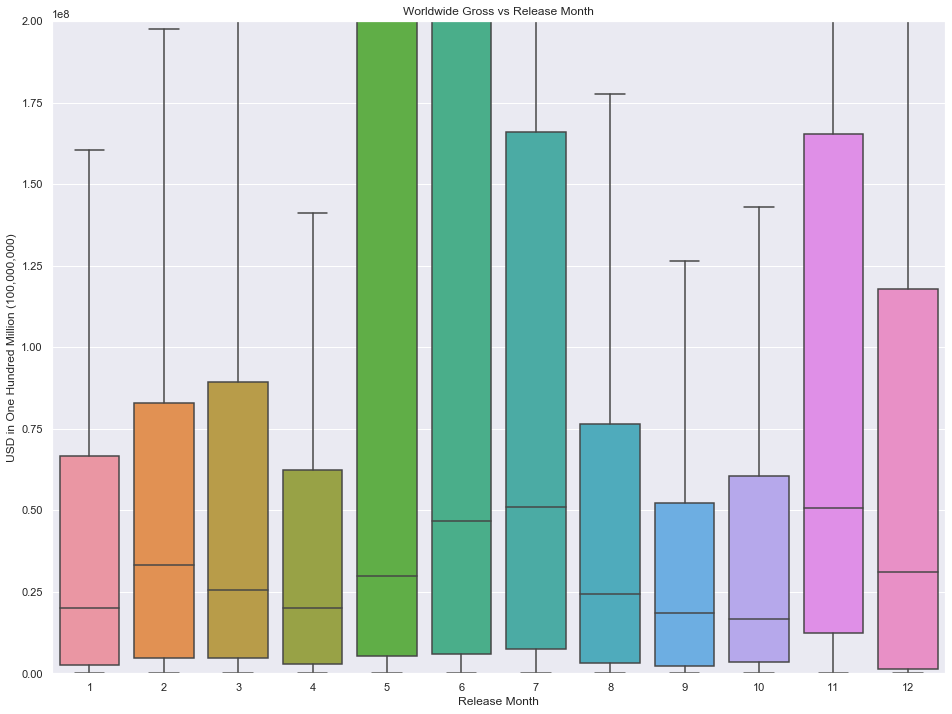

In [294]:
#creating boxplot of worldwide gross vs release date
sns.boxplot(x='release_month', y='worldwide_gross', data= tn_budgets_clean, showfliers = False)
plt.ylim([0,200000000])
plt.xlabel('Release Month')
plt.ylabel('USD in One Hundred Million (100,000,000)')
plt. title('Worldwide Gross vs Release Month')

Unfortunately, Seaborn does not take our dataframe where there are variables in each column, aka wide format. To plot with seaborn, we need to melt the dataframe by pivoting the wide format to long format.

In [303]:
#preview tn_budgets_clean dataframe (aka Wide format)
tn_budgets_clean.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,Avatar,425000000,760507625,2776345279,12
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5
2,Dark Phoenix,350000000,42762350,149762350,6
3,Avengers: Age of Ultron,330600000,459005868,1403013963,5
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12


In [326]:
#melting tn_budgets_clean dataframe from wide format to long format to make ploting eassier for searborn
tn_budgets_pres2 = tn_budgets_clean.melt(id_vars=['release_month'], value_vars= ['production_budget','domestic_gross','worldwide_gross'])

In [327]:
#preview tn_budgets_pres2 after melting (aka Long format)
tn_budgets_pres2.groupby(['release_month','variable']).mean().reset_index().head()

,release_month,variable,value
0,1,domestic_gross,2.394962e+07
1,1,production_budget,2.084349e+07
2,1,worldwide_gross,4.656382e+07
3,2,domestic_gross,3.541465e+07
4,2,production_budget,2.804642e+07


Text(0.5, 1.0, 'Production Budget and Gross vs Release Month')

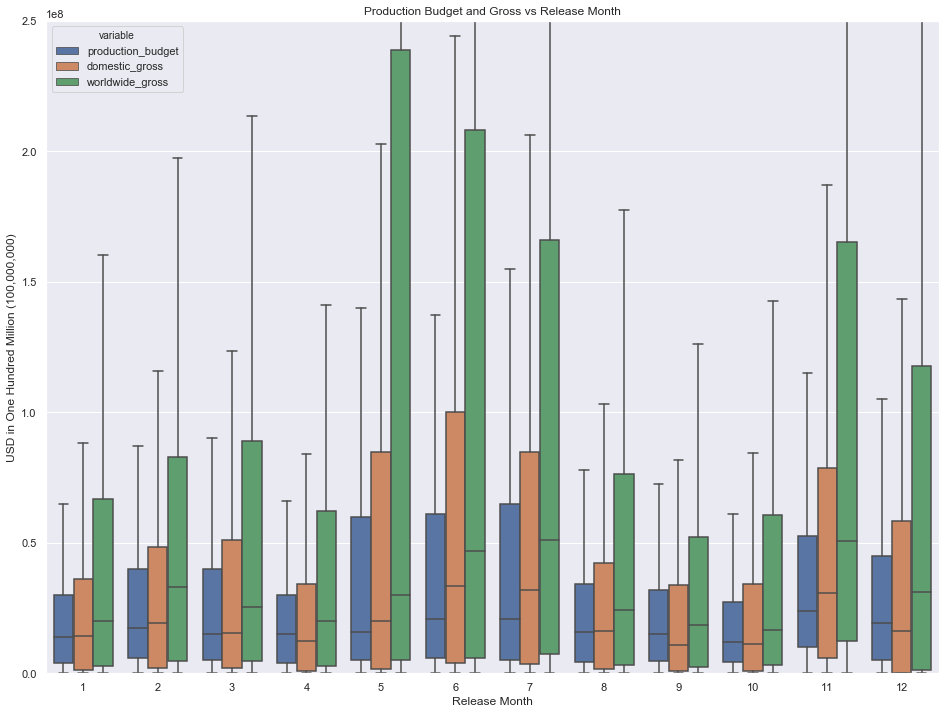

In [328]:
#ploting out tn_budgets_pres2 comparing production budget, domestic and worldwide gross side by side vs release month
#we have to cut off the axis y to focus the graph in place.
sns.boxplot(x='release_month', y='value', hue='variable', data= tn_budgets_pres2, showfliers = False)
plt.ylim([0,250000000])
plt.xlabel('Release Month')
plt.ylabel('USD in One Hundred Million (100,000,000)')
plt. title('Production Budget and Gross vs Release Month')

Analysis: The box plot shows more data than the mean bar graph. Here we were able to see the Max, Min, Mean and interquantile of budget, domestic and worldwide gross. We could also see bigger spectrum on the worldwide gross earnings especially during the summer and winter months. This is helpful for a movie producer to compare their sales standings during these seasons.

### Visualizing  dataframe (Q3: Movie Budget vs Earnings)

Initially we look into budget vs earnings using rate of return. The scatter graph shows as below.

Text(0.5, 1.0, 'Production Budget and Gross vs RoR')

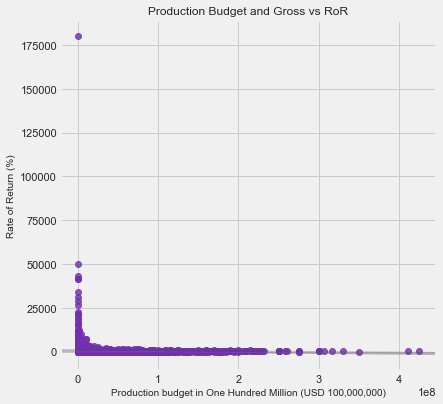

In [85]:
#plotting scatter plot using fivethirteight plot style
with plt.style.context('fivethirtyeight'):
     sns.regplot(x='production_budget', y='RoR',data = tn_budgets_earnings , 
                 scatter_kws={'color':'#7230b0'}, line_kws={'color':'#4e3f5c','alpha':0.3, 'lw':3})
plt.xlabel('Production budget in One Hundred Million (USD 100,000,000)',fontsize=10)
plt.ylabel('Rate of Return (%)',fontsize=10)
plt. title('Production Budget and Gross vs RoR')

It is hard to tell the corelationship between production budget and rate of return with above visuals. As per general knowledge, when the budget is low, or near to zero, any earnings will skewed the percentage of earnings to a high number. We shall then zoom in more and cutting down extremes of RoR above 2000%.

In [60]:
tn_RoR = tn_budgets_earnings[tn_budgets_earnings['RoR'] < 2000]

In [61]:
tn_RoR.head()

,movie,production_budget,domestic_gross,worldwide_gross,RoR,net_profit
0,Avatar,425000000,760507625,2776345279,553.26,2351345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.67,635063875
2,Dark Phoenix,350000000,42762350,149762350,-57.21,-200237650
3,Avengers: Age of Ultron,330600000,459005868,1403013963,324.38,1072413963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.37,999721747


Text(0.5, 1.0, 'Production Budget vs RoR <2000%')

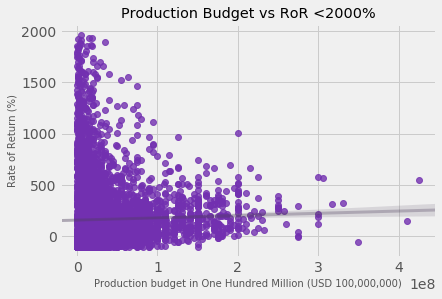

In [62]:
with plt.style.context('fivethirtyeight'):
     sns.regplot(x='production_budget', y='RoR',data = tn_RoR , 
                 scatter_kws={'color':'#7230b0'}, line_kws={'color':'#4e3f5c','alpha':0.3, 'lw':3})
plt.xlabel('Production budget in One Hundred Million (USD 100,000,000)',fontsize=10)
plt.ylabel('Rate of Return (%)',fontsize=10)
plt. title('Production Budget vs RoR <2000%')

A closer look into our first visualizations brings us to the above chart. There is no strong conclusion like more budget means better rate of return. Although in the 0 to 1.5 million interval the spectrum is a bit wider vs 1.5 million onwards.

Bottomline here is that the regression line runs around 200% return rate.

When we speak of Rate of Return, the absolute value is next thing of concern. Afterall, 1000% of 10 cents is only 100 dollar. Even though a good return for anyone, it is not much when considering feeding a company of actors and staffs. This leads us to look into net profit for insights.

Text(0.5, 1.0, 'Production Budget vs Net Profit')

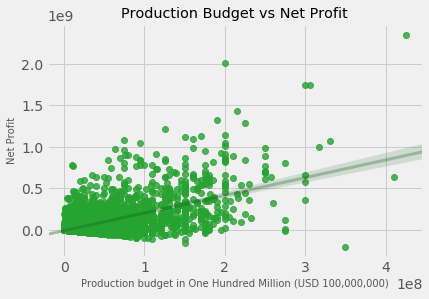

In [63]:
#plotting production budget vs net profit
with plt.style.context('fivethirtyeight'):
     sns.regplot(x='production_budget', y='net_profit',data = tn_budgets_earnings , 
                 scatter_kws={'color':'#26a330'}, line_kws={'color':'#16611c','alpha':0.3, 'lw':3})
plt.xlabel('Production budget in One Hundred Million (USD 100,000,000)',fontsize=10)
plt.ylabel('Net Profit',fontsize=10)
plt. title('Production Budget vs Net Profit')

We will try to seperate the best and worst 500 datapoints (around top and bottom 10%) to gage if there is a corelation between budgets and Net Profit.

In [64]:
tn_profit = tn_budgets_earnings.sort_values(by = 'net_profit', ascending = False).head(500)
tn_xprofit = tn_budgets_earnings.sort_values(by = 'net_profit', ascending = True).head(500)

Text(0.5, 1.0, 'Production Budget vs Net Profit for Top 500 Profitable Movies')

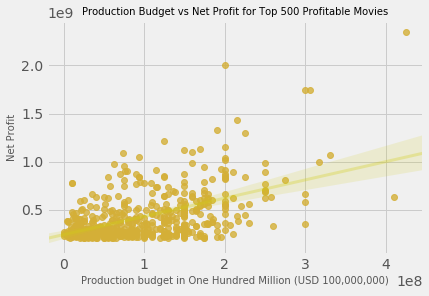

In [67]:
#plotting the 500 most profitable movies
with plt.style.context('fivethirtyeight'):
     sns.regplot(x='production_budget', y='net_profit',data = tn_profit , 
                 scatter_kws={'color':'#D4AF37'}, line_kws={'color':'#d1ce15','alpha':0.3, 'lw':3})
plt.xlabel('Production budget in One Hundred Million (USD 100,000,000)',fontsize=10)
plt.ylabel('Net Profit',fontsize=10)
plt. title('Production Budget vs Net Profit for Top 500 Profitable Movies',fontsize=10)

Analysis: Many of the most profitable movies makes a minimum of .25 Billion. Most of the sales record having production budget between 0 to 2.5 hundred million. 

Text(0.5, 1.0, 'Production Budget vs Net Profit for 500 Most Unprofitable Movies')

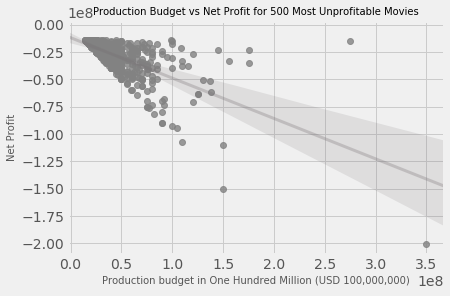

In [68]:
#ploting the 500 most unprofitable movies
with plt.style.context('fivethirtyeight'):
     sns.regplot(x='production_budget', y='net_profit',data = tn_xprofit , 
                 scatter_kws={'color':'#828282'}, line_kws={'color':'#787276','alpha':0.3, 'lw':3})
plt.xlabel('Production budget in One Hundred Million (USD 100,000,000)',fontsize=10)
plt.ylabel('Net Profit',fontsize=10)
plt. title('Production Budget vs Net Profit for 500 Most Unprofitable Movies',fontsize=10)

Analysis: Many of the most unprofitable movies report having budget from 0.2 hundred million to 1 hundred million.

## Summary/ Recommendation

Based on the 3 questions we explore, the following are a quick summary of our recoomendation for Microsoft.

1. Microsoft should focus on the top 8 genre movie. Either focusing on 1 of it or 2 to 3 appropriate combination. Documentary, drama, action are favored.

2. The release date should focus mostly on Summer or Winter Holidays. The domestic box office sale is a tale-tale sign if a movie is doing well.

3. There are certain risk with bigger budget. However, a budget in between 100 million to 250 million is recommended. Expect 200% return rate as benchmark.

## Future Work

The above analysis should gives us an idea of the movie industry, guidelines to abide by and warnings to avoid. For future partnership, the following are questions that we think would provide deeper insights into producing a profitable movie.

- Among top 8, there is a decline in Biography movies. Need more research if this is due to lack of demand or lack of content. The answer to this will be a decision to pick or avoid this genre.

- What are the average budget and earnings of each unique genre over the years?

- Instead of 1915 to 2015 data from moviedb.org, what would it be like looking into more recent data.  What about most streamed movies and streamed times since 2020 pandemic?

- Movies industries are all fighting for portion of viewers’ attention span. How much budget did the top producers put in yearly and what are their earnings?